This code is used to analyze the correlation between different parameters

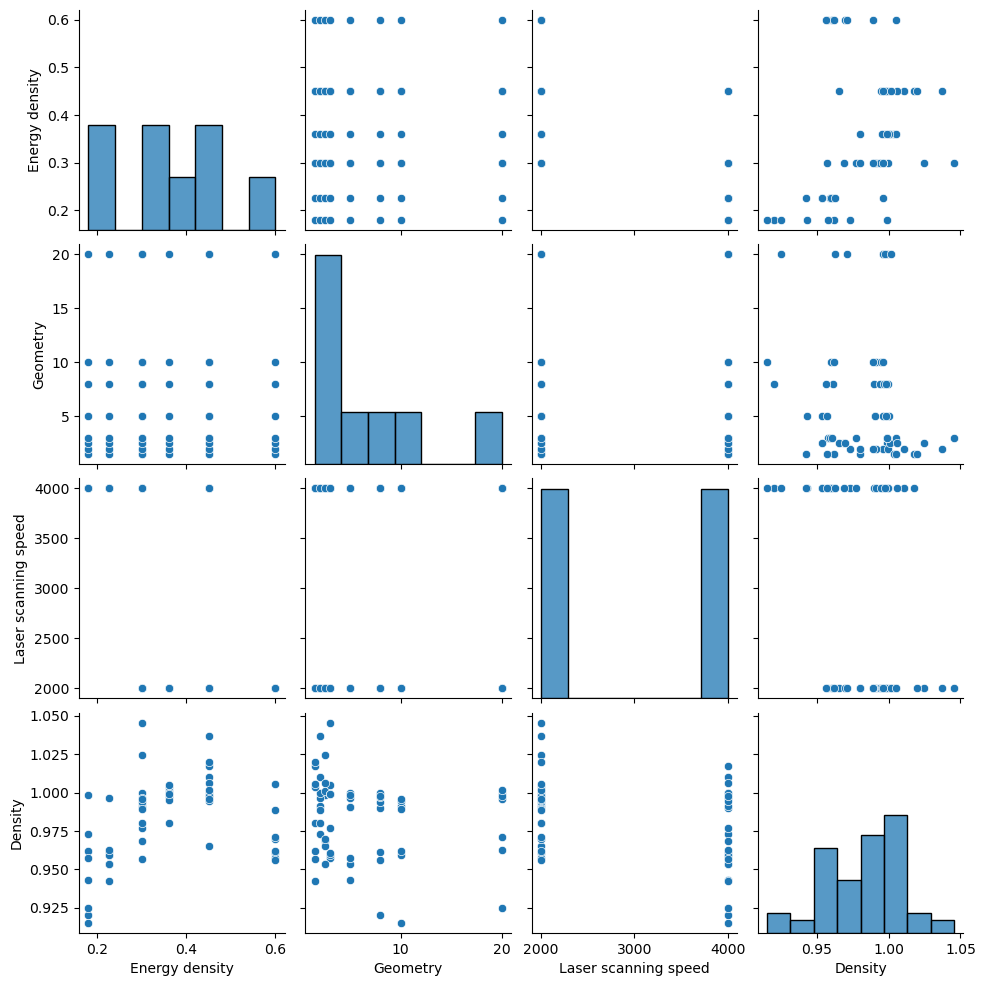

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('density_data.csv')    
x = data[['energy_density', 'size']]
y = data['porosity']
z = data[['energy_density', 'size','speed','density']]
z.columns=['Energy density', 'Geometry', 'Laser scanning speed', 'Density']
sns.pairplot(z)


<AxesSubplot:>

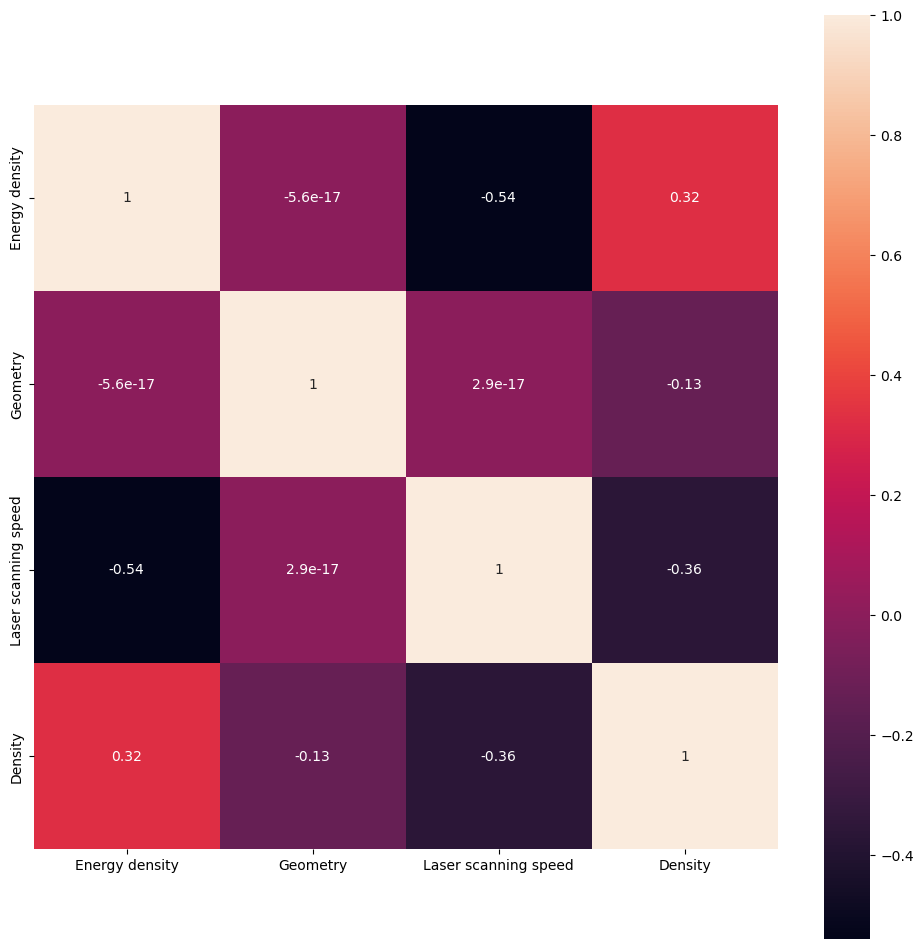

In [3]:

figure, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(z.corr(), square=True, annot=True, ax=ax)

Calculating MIC

In [4]:
from minepy import MINE

def MIC_matirx(dataframe, mine):

    data = np.array(dataframe)
    n = len(data[0, :])
    result = np.zeros([n, n])

    for i in range(n):
        for j in range(n):
            mine.compute_score(data[:, i], data[:, j])
            result[i, j] = mine.mic()
            result[j, i] = mine.mic()
    RT = pd.DataFrame(result)
    return RT

mine = MINE(alpha=0.6, c=15)
data_wine_mic = MIC_matirx(z, mine)
data_wine_mic


d:\Users\li\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


,0,1,2,3
0,1.000000e+00,6.406853e-16,0.500000,0.484649
1,6.406853e-16,1.000000e+00,0.000000,0.422807
2,5.000000e-01,0.000000e+00,1.000000,0.361851
3,4.846487e-01,4.228070e-01,0.361851,1.000000
